In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Compare the exports

Original exports in the database were made in October 2017, immediately following the cruise. There have been some minor modifications to the dataset and I have changed the intervl density, so I would like to make sure that the new numbers are similar to the original. This includes making sure all of the same geographical areas are covered and that the NASC (when spatially averaged) are consistent.

## Check the maps

3151.2914859999273

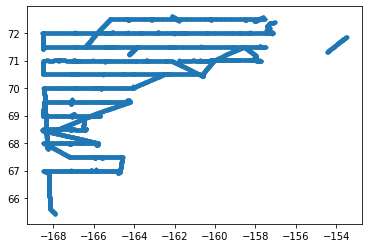

In [3]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m/*(intervals)*'))
concatenated_dfv1   = pd.concat(df_from_each_file, ignore_index=True)
plt.plot(concatenated_dfv1[' Lon_E'][concatenated_dfv1[' Lon_E'] < 999] ,concatenated_dfv1[' Lat_E'][concatenated_dfv1[' Lon_E'] < 999],'.')
sum(concatenated_dfv1[' VL_end'] - concatenated_dfv1[' VL_start'])

2634.8739709999986

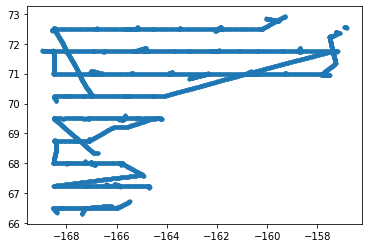

In [4]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OS201901/echoview/exports/5m/*(intervals)*'))
concatenated_dfv1   = pd.concat(df_from_each_file, ignore_index=True)
plt.plot(concatenated_dfv1['Lon_E'][concatenated_dfv1['Lon_E'] < 999] ,concatenated_dfv1['Lat_E'][concatenated_dfv1['Lon_E'] < 999],'.')
sum(concatenated_dfv1['VL_end'] - concatenated_dfv1['VL_start'])

3151.2914859999273

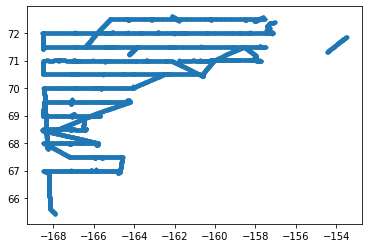

In [3]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m_2/*(intervals)*'))
concatenated_dfv2   = pd.concat(df_from_each_file, ignore_index=True)
plt.plot(concatenated_dfv2[' Lon_E'][concatenated_dfv2[' Lon_E'] < 999] ,concatenated_dfv2[' Lat_E'][concatenated_dfv2[' Lon_E'] < 999],'.')
sum(concatenated_dfv2[' VL_end'] - concatenated_dfv2[' VL_start'])

## Check the region types

In [2]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m/*(regions)*'))
concatenated_dfv1   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_dfv1[' Region_class'].unique()

array([' FISHGRP1', ' SURFTURB', ' Unknown', ' FISHGRP2',
       ' Unclassified regions', ' DEEP_FISH_UNSAMPLED'], dtype=object)

In [6]:
concatenated_dfv1.columns

Index(['Region_ID', 'Region_name', 'Region_type', 'Region_class', 'Date_s',
       'Time_s', 'Lat_s', 'Lon_s', 'Date_e', 'Time_e', 'Lat_e', 'Lon_e',
       'Log_distance_s', 'Log_distance_e', 'Region_notes'],
      dtype='object')

In [5]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OS201901/echoview/exports/5m/*(regions)*'))
concatenated_dfv1   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_dfv1['Region_class'].unique()

array(['FISHGRP1', 'Unclassified regions', 'FISHGRP2', 'SURFTURB',
       'FISHGRP3', 'FISHGRP4', 'FISHGRP5'], dtype=object)

In [5]:
concatenated_dfv1[concatenated_dfv1[' Region_class'] == ' DEEP_FISH_UNSAMPLED']

,Region_ID,Region_name,Region_type,Region_class,Date_s,Time_s,Lat_s,Lon_s,Date_e,Time_e,Lat_e,Lon_e,Log_distance_s,Log_distance_e,Region_notes
110,21,Region21_C3,Analysis,DEEP_FISH_UNSAMPLED,8/31/2017,14:54:37.5880,72.499293,-157.775104,8/31/2017,15:31:41.3100,72.501765,-157.540668,4109.4316,4113.6631,""""""
117,18,Region18_C3,Analysis,DEEP_FISH_UNSAMPLED,9/1/2017,01:08:25.7250,72.392648,-157.006661,9/1/2017,04:27:46.6460,72.253940,-157.404738,4156.4500,4171.2532,""""""


In [6]:
df_from_each_file = (pd.read_csv(f) for f in glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m_2/*(regions)*'))
concatenated_dfv2   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_dfv2[' Region_class'].unique()

array([' FISHGRP1', ' SURFTURB', ' Unknown', ' FISHGRP2',
       ' Unclassified regions', ' DEEP_FISH_UNSAMPLED'], dtype=object)

In [7]:
concatenated_dfv2[concatenated_dfv2[' Region_class'] == ' DEEP_FISH_UNSAMPLED']

,Region_ID,Region_name,Region_type,Region_class,Date_s,Time_s,Lat_s,Lon_s,Date_e,Time_e,Lat_e,Lon_e,Log_distance_s,Log_distance_e,Region_notes
111,21,Region21_C3,Analysis,DEEP_FISH_UNSAMPLED,8/31/2017,14:54:37.5880,72.499293,-157.775104,8/31/2017,15:31:41.3100,72.501765,-157.540668,4109.4316,4113.6631,""""""
118,18,Region18_C3,Analysis,DEEP_FISH_UNSAMPLED,9/1/2017,01:08:25.7250,72.392648,-157.006661,9/1/2017,04:27:46.6460,72.253940,-157.404738,4156.4500,4171.2532,""""""


## Check the NASC

In [8]:
df_from_each_file = (pd.read_csv(f) for f in sorted(glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m/*(cells)*')))
concatenated_dfv1   = pd.concat(df_from_each_file, ignore_index=True)
test1 = concatenated_dfv1[concatenated_dfv1[' Region_class'] == ' "FISHGRP1"']
test1.groupby(' Interval').sum().mean()[' PRC_NASC']

1137.3449980786095

In [9]:
df_from_each_file = (pd.read_csv(f) for f in sorted(glob('D:/AIESII/OceanStarr_201701_AIERP/Echoview/exports/5m_2/*(cells)*')))
concatenated_dfv2   = pd.concat(df_from_each_file, ignore_index=True)
test2 = concatenated_dfv2[concatenated_dfv2[' Region_class'] == ' "FISHGRP1"']
test2.groupby(' Interval').sum().mean()[' PRC_NASC']

1116.0628717351362

In [10]:
# The ratio of the original dataset to the new dataset
test1.groupby(' Interval').sum().mean()[' PRC_NASC']/test2.groupby(' Interval').sum().mean()[' PRC_NASC']

1.019068931403825